In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv('../data/SeoulBikeData_utf8.csv')
data.columns= [x.lower() for x in data.columns]
data=data[data["functioning day"]=="Yes"]
data["date"]=pd.to_datetime(data["date"],format="%d/%m/%Y")
data.shape

(8465, 14)

In [3]:
data.columns

Index(['date', 'rented bike count', 'hour', 'temperature(c)', 'humidity(%)',
       'wind speed (m/s)', 'visibility (10m)', 'dew point temperature(c)',
       'solar radiation (mj/m2)', 'rainfall(mm)', 'snowfall (cm)', 'seasons',
       'holiday', 'functioning day'],
      dtype='object')

In [4]:
target="rented bike count"
columns_to_exclude= ['rainfall(mm)','snowfall (cm)','functioning day']
x_cols= [x for x in data.columns  if x != target and x not in columns_to_exclude ]


In [5]:
data.head()

date  rented bike count  hour  temperature(c)  humidity(%)  \
0 2017-12-01                254     0            -5.2           37   
1 2017-12-01                204     1            -5.5           38   
2 2017-12-01                173     2            -6.0           39   
3 2017-12-01                107     3            -6.2           40   
4 2017-12-01                 78     4            -6.0           36   

   wind speed (m/s)  visibility (10m)  dew point temperature(c)  \
0               2.2              2000                     -17.6   
1               0.8              2000                     -17.6   
2               1.0              2000                     -17.7   
3               0.9              2000                     -17.6   
4               2.3              2000                     -18.6   

   solar radiation (mj/m2)  rainfall(mm)  snowfall (cm) seasons     holiday  \
0                      0.0           0.0            0.0  Winter  No Holiday   
1                      0.0           0.0            0.0  Winter  No Holiday   
2                      0.0           0.0            0.0  Winter  No Holiday   
3                      0.0           0.0            0.0  Winter  No Holiday   
4                      0.0           0.0            0.0  Winter  No Holiday   

  functioning day  
0             Yes  
1             Yes  
2             Yes  
3             Yes  
4             Yes

In [6]:
data.dtypes

date                        datetime64[ns]
rented bike count                    int64
hour                                 int64
temperature(c)                     float64
humidity(%)                          int64
wind speed (m/s)                   float64
visibility (10m)                     int64
dew point temperature(c)           float64
solar radiation (mj/m2)            float64
rainfall(mm)                       float64
snowfall (cm)                      float64
seasons                             object
holiday                             object
functioning day                     object
dtype: object

# Estadisticas descriptivas

In [7]:
data.describe()

date  rented bike count         hour  \
count                           8465        8465.000000  8465.000000   
mean   2018-05-28 09:14:23.744831744         729.156999    11.507029   
min              2017-12-01 00:00:00           2.000000     0.000000   
25%              2018-02-27 00:00:00         214.000000     6.000000   
50%              2018-05-28 00:00:00         542.000000    12.000000   
75%              2018-08-24 00:00:00        1084.000000    18.000000   
max              2018-11-30 00:00:00        3556.000000    23.000000   
std                              NaN         642.351166     6.920899   

       temperature(c)  humidity(%)  wind speed (m/s)  visibility (10m)  \
count     8465.000000  8465.000000       8465.000000       8465.000000   
mean        12.771057    58.147194          1.725883       1433.873479   
min        -17.800000     0.000000          0.000000         27.000000   
25%          3.000000    42.000000          0.900000        935.000000   
50%         13.500000    57.000000          1.500000       1690.000000   
75%         22.700000    74.000000          2.300000       2000.000000   
max         39.400000    98.000000          7.400000       2000.000000   
std         12.104375    20.484839          1.034281        609.051229   

       dew point temperature(c)  solar radiation (mj/m2)  rainfall(mm)  \
count               8465.000000              8465.000000    8465.00000   
mean                   3.944997                 0.567868       0.14912   
min                  -30.600000                 0.000000       0.00000   
25%                   -5.100000                 0.000000       0.00000   
50%                    4.700000                 0.010000       0.00000   
75%                   15.200000                 0.930000       0.00000   
max                   27.200000                 3.520000      35.00000   
std                   13.242399                 0.868245       1.12554   

       snowfall (cm)  
count    8465.000000  
mean        0.077685  
min         0.000000  
25%         0.000000  
50%         0.000000  
75%         0.000000  
max         8.800000  
std         0.444063

In [8]:
print(f' Porcentaje de datos con valores de rainfall(mm) {np.round((data[data["rainfall(mm)"]!=0].shape[0]/data.shape[0])*100,2)}%')

 Porcentaje de datos con valores de rainfall(mm) 6.1%


In [9]:
print(f' Porcentaje de datos con valores de snowfall (cm) {np.round((data[data["snowfall (cm)"]!=0].shape[0]/data.shape[0])*100,2)}%')

 Porcentaje de datos con valores de snowfall (cm) 5.23%


In [10]:
print(f' Porcentaje de datos con valores de solar radiation (mj/m2) {np.round((data[data["solar radiation (mj/m2)"]!=0].shape[0]/data.shape[0])*100,2)}%')

 Porcentaje de datos con valores de solar radiation (mj/m2) 50.96%


In [11]:
data=data[x_cols+[target]]

### Histogramas por cada variable y dispersión entre variables

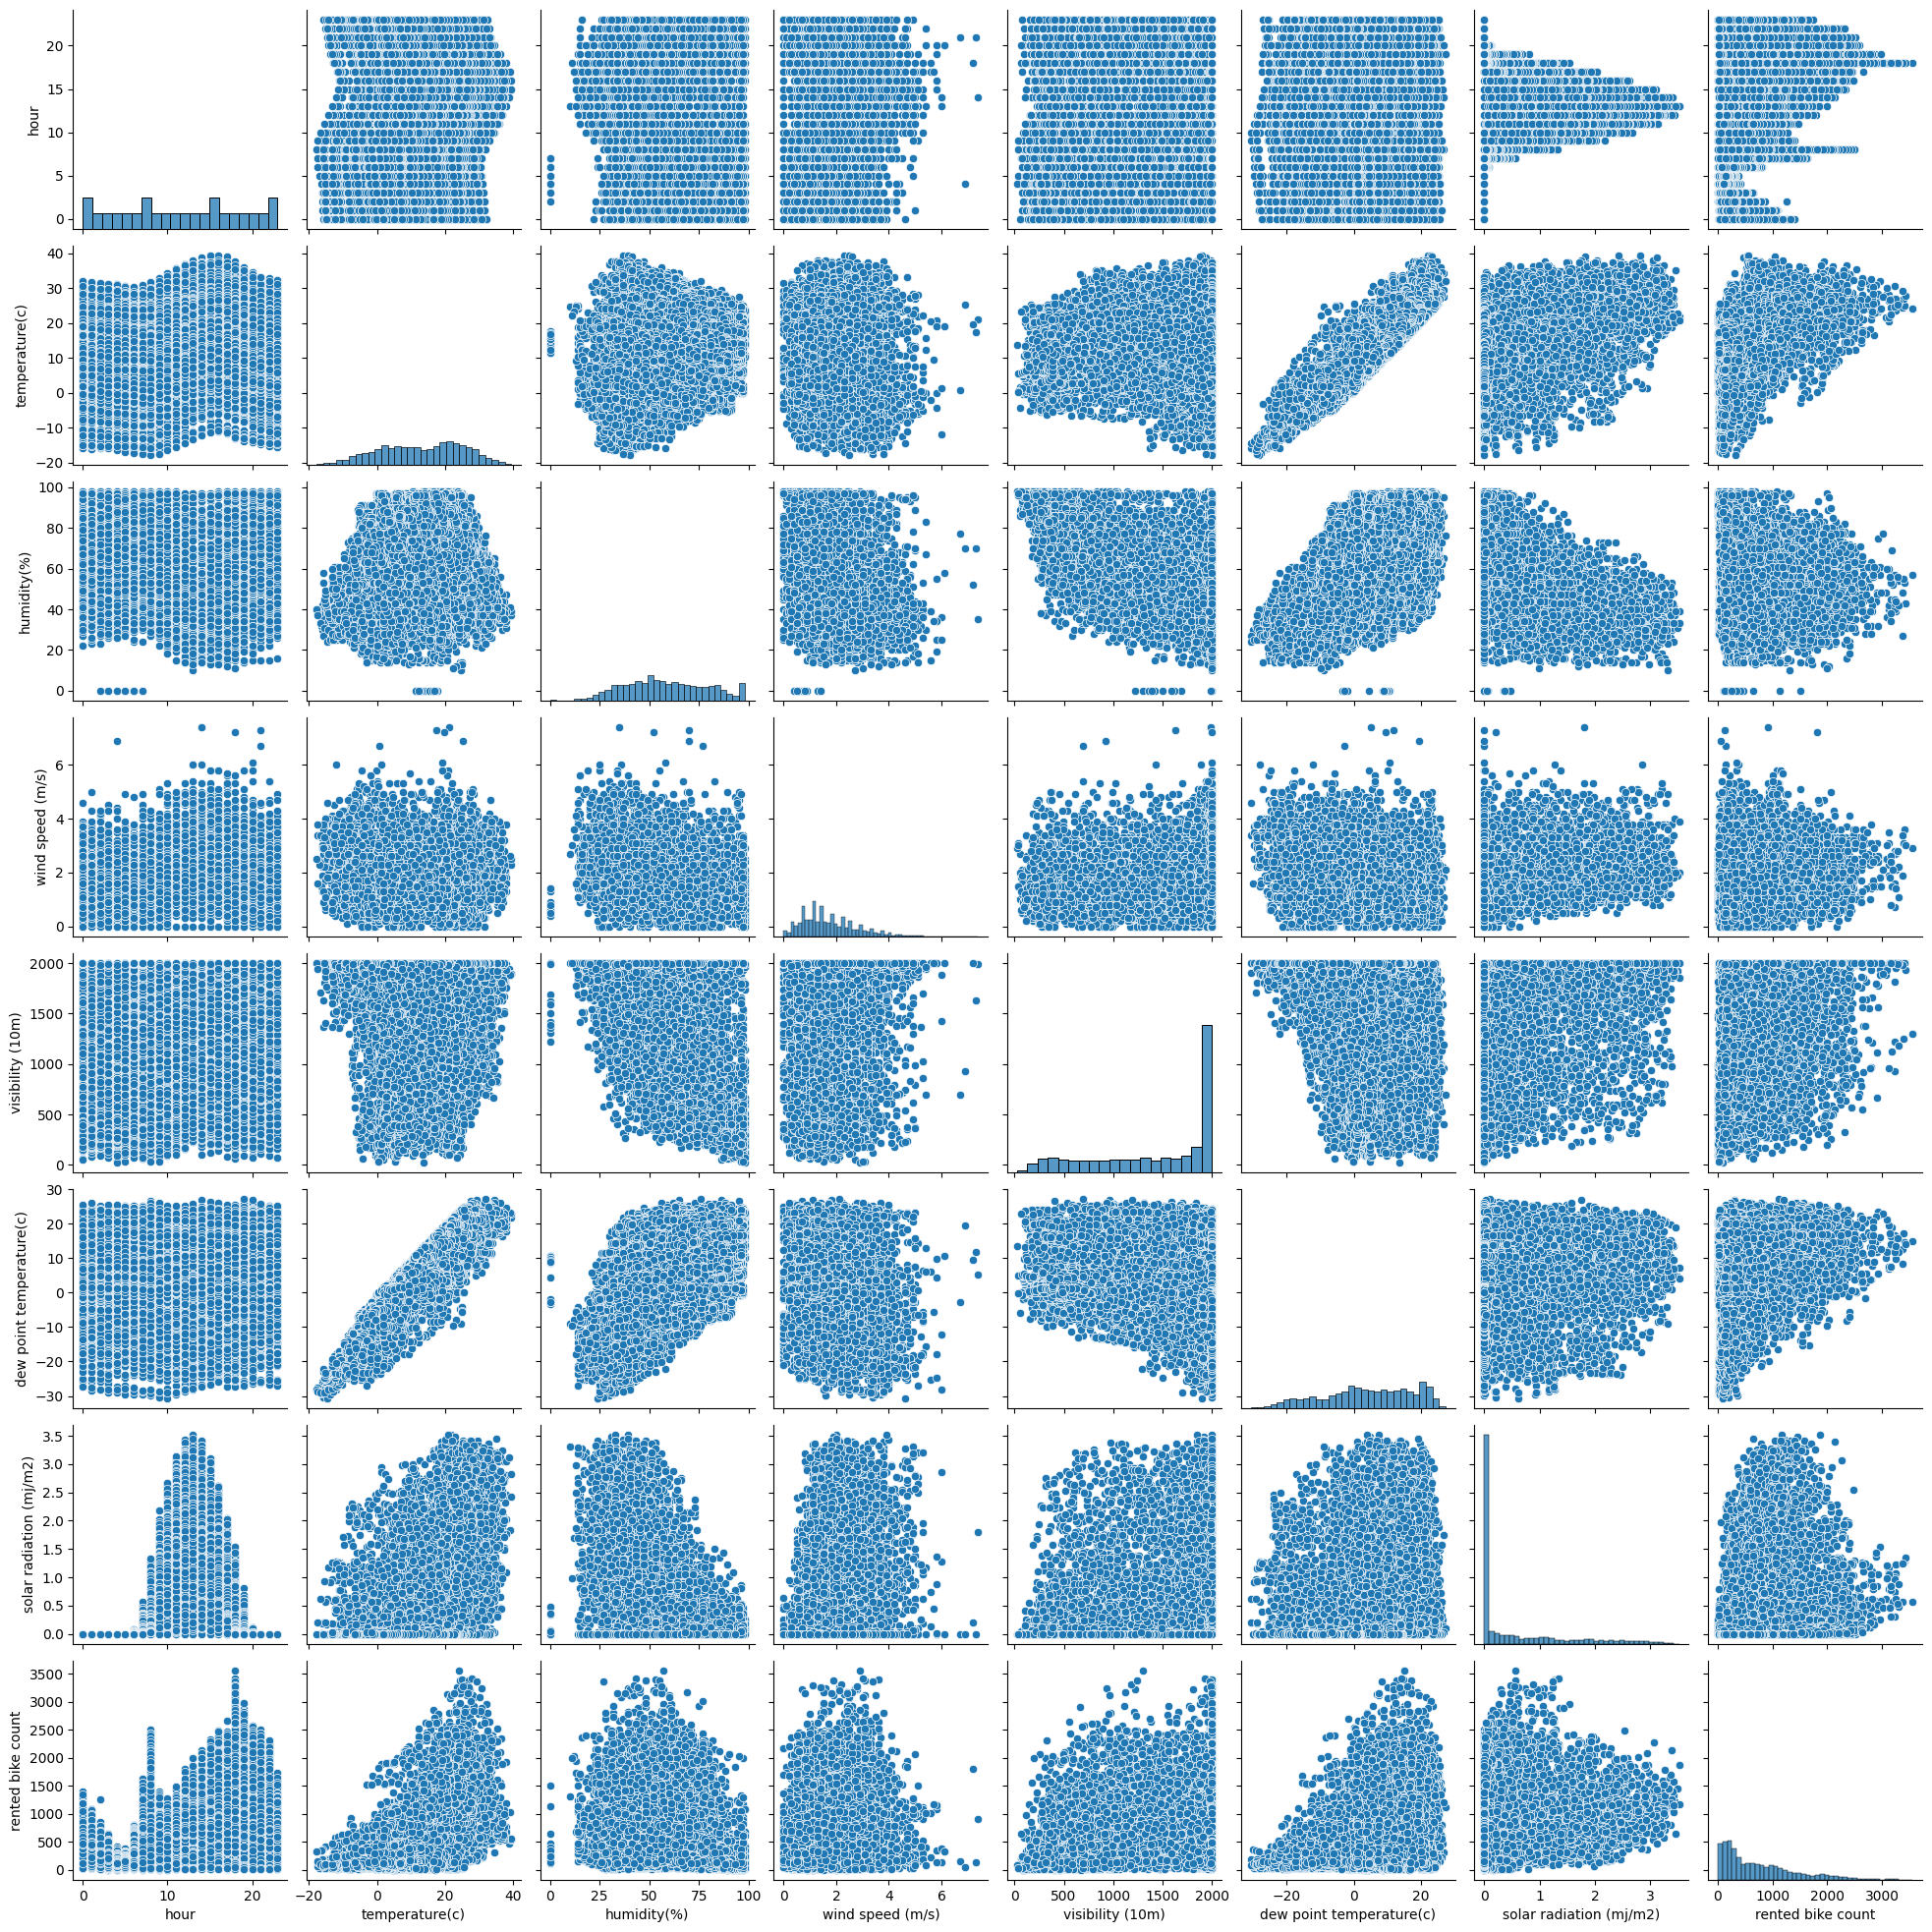

In [12]:
sns.pairplot(data,)

<Axes: xlabel='seasons', ylabel='rented bike count'>

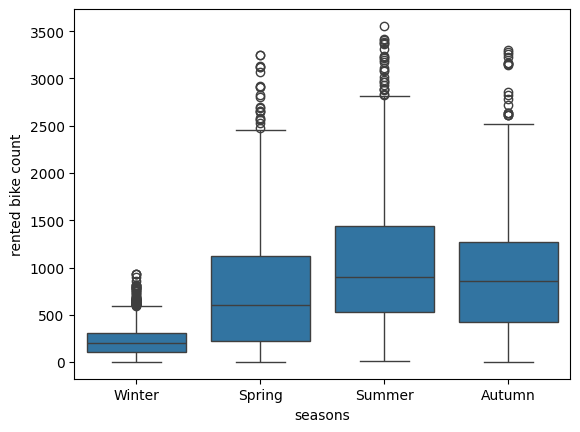

In [13]:
sns.boxplot(x='seasons',y=target,data=data)

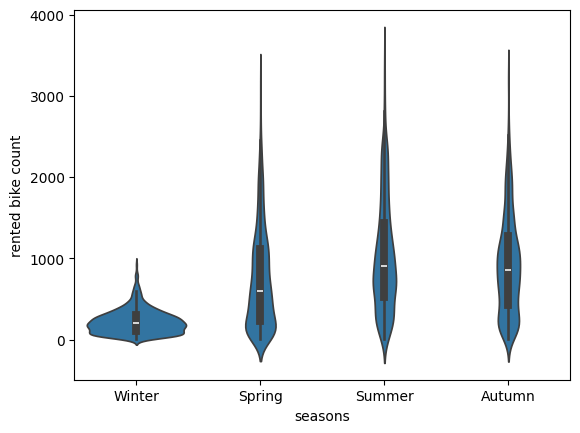

In [49]:
sns.violinplot(x='seasons',y=target,data=data)
# Show the plot
plt.show()

<Axes: xlabel='holiday', ylabel='rented bike count'>

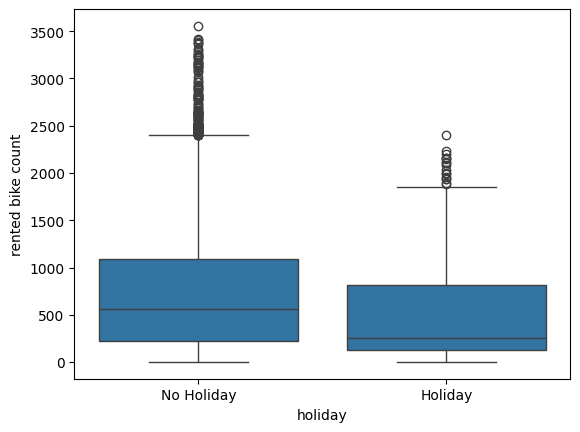

In [14]:
sns.boxplot(x='holiday',y=target,data=data)

<Axes: xlabel='holiday', ylabel='rented bike count'>

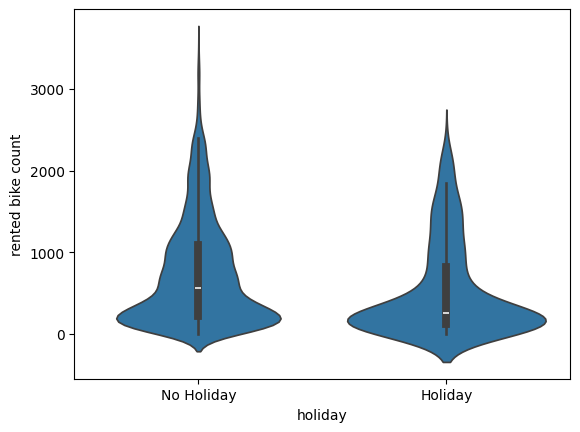

In [51]:
sns.violinplot(x='holiday',y=target,data=data)

In [16]:
# print(f' Porcentaje de datos con valores de functioning day {np.round((data[data["functioning day"]=="No"].shape[0]/data.shape[0])*100,2)}%')

### Matriz de correlación

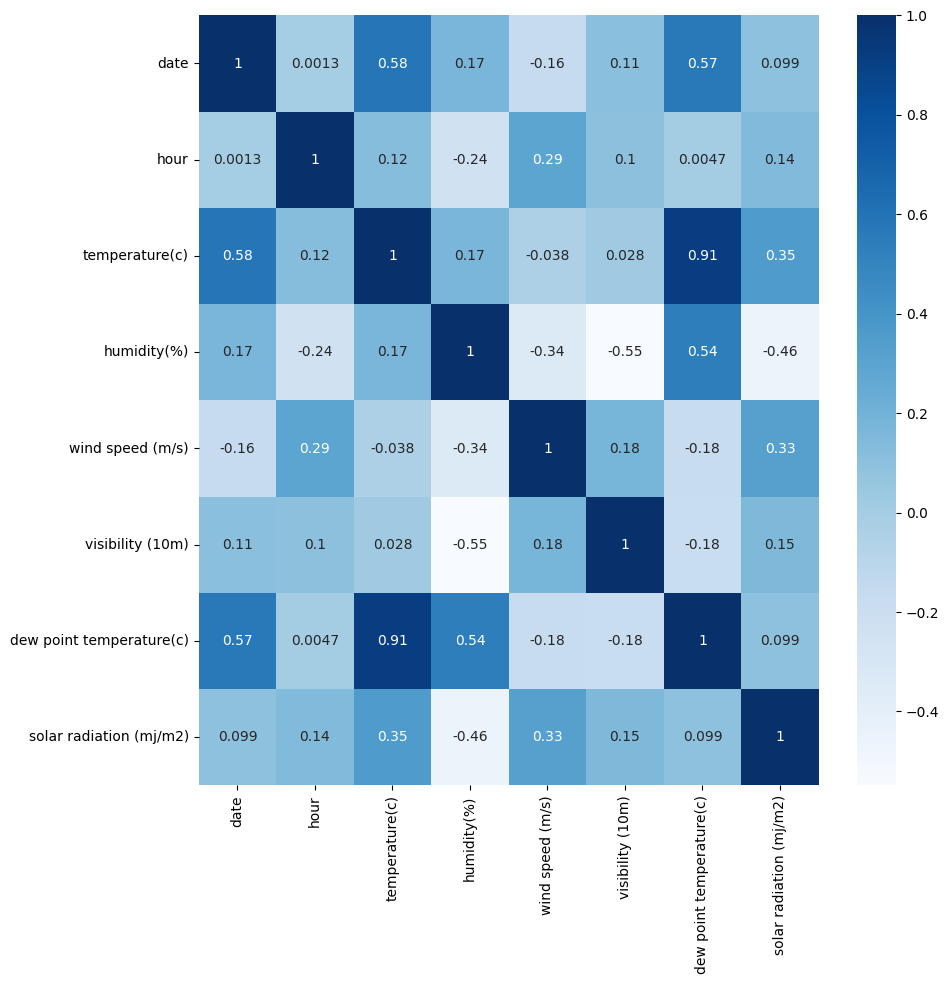

In [24]:
corr = data[x_cols].select_dtypes(exclude=['object']).corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr, cmap="Blues", annot=True)
plt.show()

<Axes: >

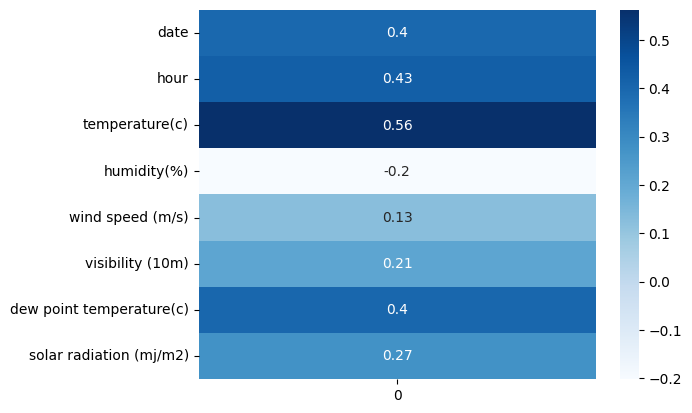

In [22]:
corrw = data.select_dtypes(exclude=['object']).drop([target], axis=1).corrwith(data[target])
sns.heatmap(pd.DataFrame(corrw), cmap="Blues", annot=True)

### Diagramas de dispersión y tendencia entre variables de entrada y variable de respuesta

<Figure size 2500x1000 with 0 Axes>

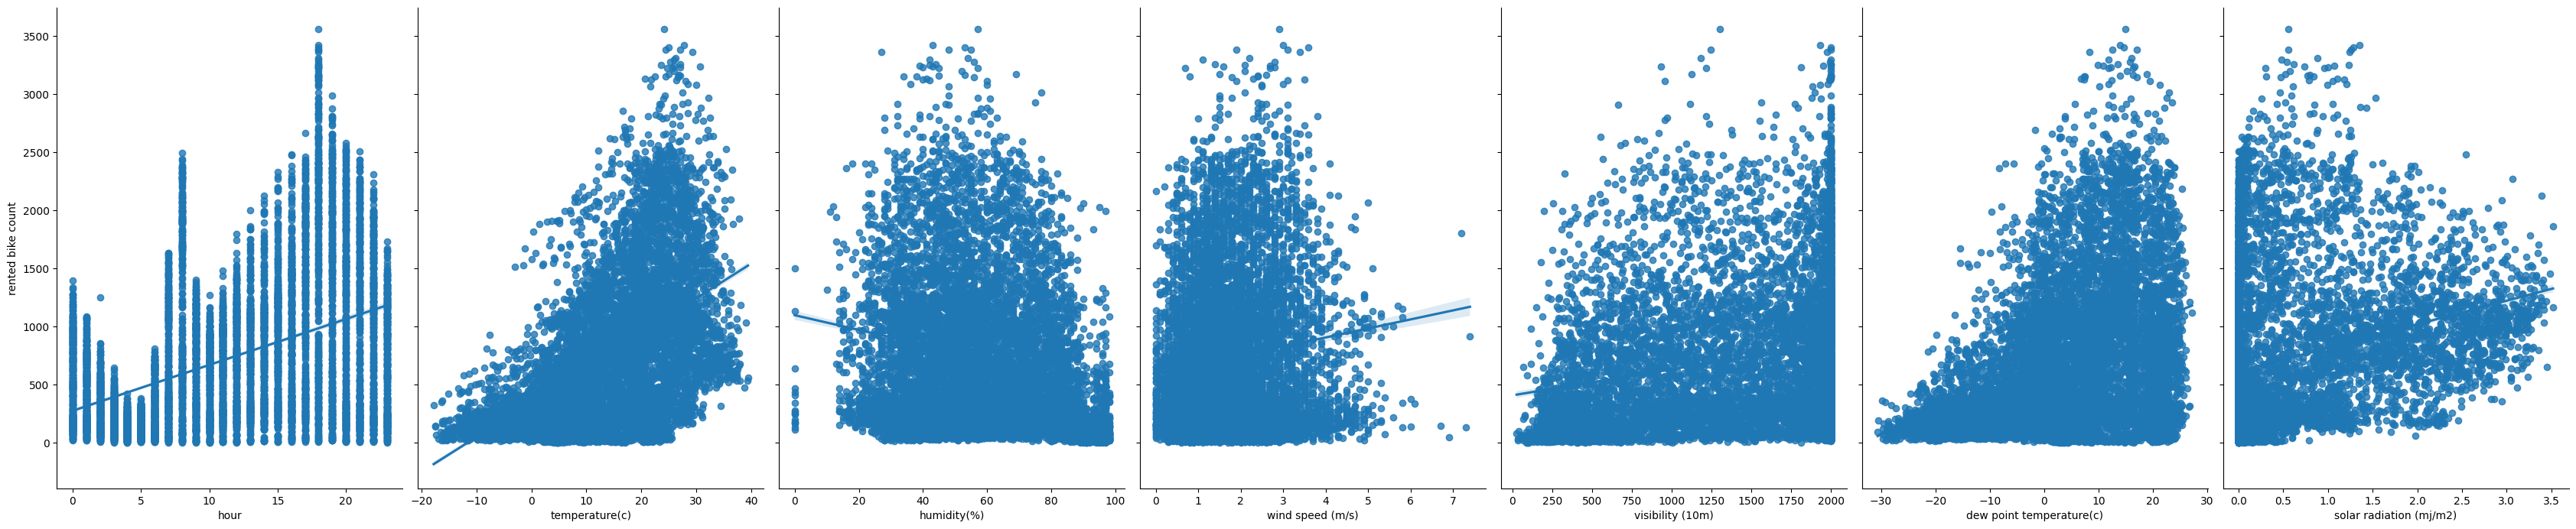

In [23]:
plt.figure(figsize=(25,10))
sns.pairplot(data=data, x_vars=['hour',
 'temperature(c)',
 'humidity(%)',
 'wind speed (m/s)',
 'visibility (10m)',
 'dew point temperature(c)',
 'solar radiation (mj/m2)',
 ], y_vars=target, height=7, aspect=0.7, kind='reg')
plt.show()


In [25]:
data.head()

date  hour  temperature(c)  humidity(%)  wind speed (m/s)  \
0 2017-12-01     0            -5.2           37               2.2   
1 2017-12-01     1            -5.5           38               0.8   
2 2017-12-01     2            -6.0           39               1.0   
3 2017-12-01     3            -6.2           40               0.9   
4 2017-12-01     4            -6.0           36               2.3   

   visibility (10m)  dew point temperature(c)  solar radiation (mj/m2)  \
0              2000                     -17.6                      0.0   
1              2000                     -17.6                      0.0   
2              2000                     -17.7                      0.0   
3              2000                     -17.6                      0.0   
4              2000                     -18.6                      0.0   

  seasons     holiday  rented bike count  
0  Winter  No Holiday                254  
1  Winter  No Holiday                204  
2  Winter  No Holiday                173  
3  Winter  No Holiday                107  
4  Winter  No Holiday                 78

<Axes: xlabel='date', ylabel='mean rented bike count'>

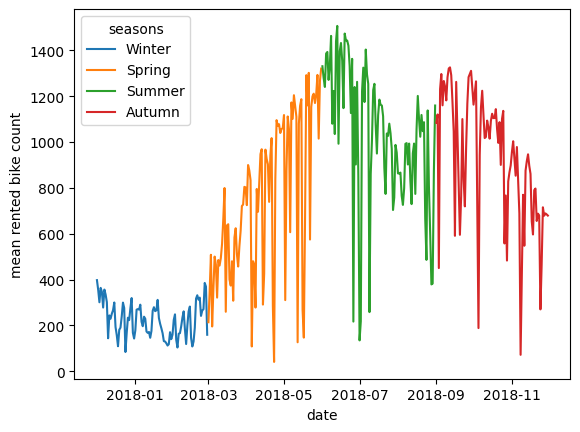

In [48]:
agg_data=data.groupby(by=["date","seasons"]).agg({"rented bike count":"mean"}).reset_index().rename(columns={"rented bike count":"mean rented bike count"})
sns.lineplot(x='date',y="mean rented bike count",data=agg_data,hue='seasons')

<Axes: xlabel='date', ylabel='mean rented bike count'>

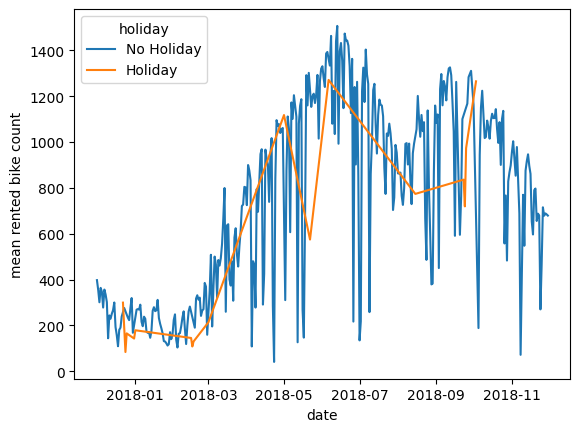

In [47]:
agg_data_2=data.groupby(by=["date","holiday"]).agg({"rented bike count":"mean"}).reset_index().rename(columns={"rented bike count":"mean rented bike count"})
sns.lineplot(x='date',y="mean rented bike count",data=agg_data_2,hue='holiday')

In [46]:
data.groupby(by=["date","holiday"]).agg({"rented bike count":"count"}).reset_index().groupby("holiday").agg({"date":"count"}).rename(columns={"date":"Number of dates"})

Number of dates
holiday                    
Holiday                  17
No Holiday              336

In [57]:
data.columns

Index(['date', 'hour', 'temperature(c)', 'humidity(%)', 'wind speed (m/s)',
       'visibility (10m)', 'dew point temperature(c)',
       'solar radiation (mj/m2)', 'seasons', 'holiday', 'rented bike count'],
      dtype='object')

In [55]:
x_cols= [x for x in x_cols if x not in ['dew point temperature(c)', 'holiday']]

In [59]:
final_df=data[x_cols+[target]]
final_df.shape

(8465, 9)

In [60]:
final_df.columns

Index(['date', 'hour', 'temperature(c)', 'humidity(%)', 'wind speed (m/s)',
       'visibility (10m)', 'solar radiation (mj/m2)', 'seasons',
       'rented bike count'],
      dtype='object')